# EDA

### **In this part we performs basic Exploratory Data Analysis (EDA) on the chosen dataset. It includes data loading, cleaning, visualization, and summary statistics to understand the underlying patterns and relationships within the data.**
---
#### Made by: Yan Marchan, Andrey Patsino, Uladzislau Bandarenka

In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np



PATH_TO_DATA = "../csv_exports/"

### Step 1: Data loading

Initialize dataframe on main dataset. Using flag `low_memory = False` not to limit memory usage.


Lets add item dataset as df_items.

In [187]:
df_items = pd.read_csv(PATH_TO_DATA + "item_full_export.csv", low_memory=False)
df_items

,id,market_hash_name,classid,price,real_instance,old_price,base_id,phase,paintindex,type,avg_price,instanceid,asset,stamp,float,paintseed,stickers,chance_to_transfer
0,5874477719,Gallery Case,6207888461,1040.0,519977179,0.0,102931,NaN,NaN,NaN,0.93,519977179,39907486718,2024-11-15 00:26:32,NaN,NaN,NaN,100.0
1,5874550751,Gallery Case,6210138906,1040.0,519977179,678.0,102931,NaN,NaN,NaN,0.93,519977179,39894372504,2024-11-15 00:31:10,NaN,NaN,NaN,100.0
2,5874556871,Gallery Case,6210138906,1040.0,519977179,678.0,102931,NaN,NaN,NaN,0.93,519977179,39894370852,2024-11-15 00:31:05,NaN,NaN,NaN,100.0
3,5874573783,Gallery Case,6210138906,1040.0,519977179,0.0,102931,NaN,NaN,NaN,0.93,519977179,39913977137,2024-11-15 00:32:02,NaN,NaN,NaN,40.0
4,5874591479,Gallery Case,6210138906,1040.0,519977179,0.0,102931,NaN,NaN,NaN,0.93,519977179,39862909292,2024-11-15 00:30:59,NaN,NaN,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954577,5908578415,P250 | Bengal Tiger (Minimal Wear),6221066019,14101.0,480085569,0.0,81962,NaN,NaN,Pistol,16.77,480085569,40051590945,2024-11-15 00:32:51,NaN,NaN,18176467130|18165022175|18317984325|5130567693...,90.0
954578,5908578423,Sticker | Ancient Marauder,4141779144,262.0,519977179,0.0,82100,NaN,NaN,Sticker,0.35,519977179,40175332144,2024-11-15 00:32:54,NaN,NaN,NaN,85.0
954579,5908578431,Sticker | Ancient Marauder,4141779144,262.0,519977179,0.0,82100,NaN,NaN,Sticker,0.35,519977179,40175331544,2024-11-15 00:32:55,NaN,NaN,NaN,85.0
954580,5908578439,Sticker | Ancient Marauder,4141779144,262.0,519977179,0.0,82100,NaN,NaN,Sticker,0.35,519977179,40175331457,2024-11-15 00:32:56,NaN,NaN,NaN,85.0


The initial dimensionality of the created dataframe is 742728 rows x 18 columns.



The price in the dataset is in (dollar+cents)*1000. Lets "standartize" it to just dollar+cents to match the avg_price format.

In [188]:
df_items['price'] = df_items["price"]/1000


### Step 2: Gather basic info on the dataset

In [189]:
# Display basic information about the dataset
df_items.info()

# Display summary statistics for numerical columns
df_items.describe()

# Display the number of unique values in each column
df_items.nunique()

# Display the number of missing values in each column
df_items.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954582 entries, 0 to 954581
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  954582 non-null  int64  
 1   market_hash_name    954582 non-null  object 
 2   classid             954582 non-null  int64  
 3   price               954582 non-null  float64
 4   real_instance       954582 non-null  int64  
 5   old_price           954582 non-null  float64
 6   base_id             954582 non-null  int64  
 7   phase               1114 non-null    object 
 8   paintindex          480783 non-null  float64
 9   type                940061 non-null  object 
 10  avg_price           954582 non-null  float64
 11  instanceid          954582 non-null  int64  
 12  asset               954582 non-null  int64  
 13  stamp               954582 non-null  object 
 14  float               484655 non-null  float64
 15  paintseed           479125 non-nul

id                         0
market_hash_name           0
classid                    0
price                      0
real_instance              0
old_price                  0
base_id                    0
phase                 953468
paintindex            473799
type                   14521
avg_price                  0
instanceid                 0
asset                      0
stamp                      0
float                 469927
paintseed             475457
stickers              802041
chance_to_transfer         0
dtype: int64

### Step 3: Check for duplicates

The data gathered was loaded from the db with id as a pk with a unique constraint so no duplitates are possibe. Nevertheless, lets check the uniqueness of each field.


In [190]:
# Check for duplicate rows in the dataset
duplicate_rows = df_items[df_items.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display duplicate rows if any
if duplicate_rows.shape[0] > 0:
    display(duplicate_rows)

unique_counts = df_items.nunique()
print("Number of unique values in each column:")
print(unique_counts)

if df_items['id'].is_unique:
    print("The 'id' field is unique.")
else:
    print("The 'id' field is not unique.")

Number of duplicate rows: 0
Number of unique values in each column:
id                    954582
market_hash_name       19482
classid               242146
price                  41417
real_instance          29058
old_price              52366
base_id                 9002
phase                      8
paintindex              1163
type                      22
avg_price               5523
instanceid             29063
asset                 877224
stamp                  14503
float                 477435
paintseed               1000
stickers               74718
chance_to_transfer        94
dtype: int64
The 'id' field is unique.


### Step 4: Assessment of data gaps

In [191]:
# Определение столбцов с пропущенными значениями
missing_values = df_items.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values_percentage = (missing_values / len(df_items)) * 100

# Создание DataFrame для удобного отображения
missing_data_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_values_percentage
})

# Сортировка по количеству пропущенных значений
missing_data_df = missing_data_df.sort_values(by='Missing Values', ascending=False)

missing_data_df

,Missing Values,Percentage
phase,953468,99.883300
stickers,802041,84.020126
paintseed,475457,49.807874
paintindex,473799,49.634185
float,469927,49.228563
type,14521,1.521189


### Step 5: Proccessing of data gaps

As we saw in the previous output, some items lack values for avg_price or float, marked as NaN or zeros. This data is not useful for us, so let's remove it.

In [192]:
df_items.dropna(subset=["float", "avg_price"], inplace = True)
df_items = df_items[(df_items["float"] != 0) & (df_items["avg_price"] != 0)]
df_items

,id,market_hash_name,classid,price,real_instance,old_price,base_id,phase,paintindex,type,avg_price,instanceid,asset,stamp,float,paintseed,stickers,chance_to_transfer
20,5906181903,P90 | Grim (Well-Worn),6260975890,0.139,188530139,139.0,2026,NaN,611.0,SMG,0.16,188530139,40323304914,2024-11-15 00:17:08,0.401281,867.0,NaN,100.0
547,529702123,Souvenir MP5-SD | Lab Rats (Factory New),3106097319,1.666,338584038,0.0,76513,NaN,800.0,SMG,0.22,338584038,15256821968,2024-11-15 00:22:40,0.030103,519.0,1682269663,70.0
549,541972057,PP-Bizon | Sand Dashed (Field-Tested),310776558,6.056,0,6000.0,33,NaN,148.0,SMG,0.03,0,4971806121,2024-11-15 00:22:40,0.167246,948.0,NaN,70.0
550,541972168,AUG | Condemned (Battle-Scarred),310779217,0.707,302028390,5000.0,39,NaN,110.0,Rifle,0.05,302028390,14477924513,2024-11-15 00:02:47,0.659919,41.0,NaN,70.0
551,541972222,MP7 | Army Recon (Field-Tested),310776668,54.399,0,39000.0,55,NaN,245.0,SMG,0.03,0,14938633170,2024-11-15 00:22:40,0.232036,296.0,NaN,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954568,5908578335,Desert Eagle | Trigger Discipline (Battle-Scar...,4428765262,224.396,6281139810,0.0,84469,NaN,1050.0,Pistol,0.44,6281139810,40299108275,2024-11-15 00:32:46,0.477739,510.0,NaN,100.0
954569,5908578343,CZ75-Auto | Green Plaid (Minimal Wear),519982703,3.937,519977179,0.0,541,NaN,366.0,Pistol,4.12,519977179,40165872443,2024-11-15 00:32:51,0.123855,490.0,NaN,100.0
954570,5908578351,Galil AR | Crimson Tsunami (Field-Tested),2220041623,1.262,6276312643,0.0,3091,NaN,647.0,Rifle,1.75,6276312643,40190989650,2024-11-15 00:32:52,0.245613,65.0,18255840860,100.0
954571,5908578359,Desert Eagle | Trigger Discipline (Battle-Scar...,4428765262,224.396,6281139808,0.0,84469,NaN,1050.0,Pistol,0.44,6281139808,40299128047,2024-11-15 00:32:51,0.854335,12.0,NaN,100.0


Nice! Now we have 343,201 rows × 18 columns. Lets move on with further cleanup!

### Step 6: Data Distribution Analysis

Lets analyze the distribution of numerical columns using histograms and box plots.

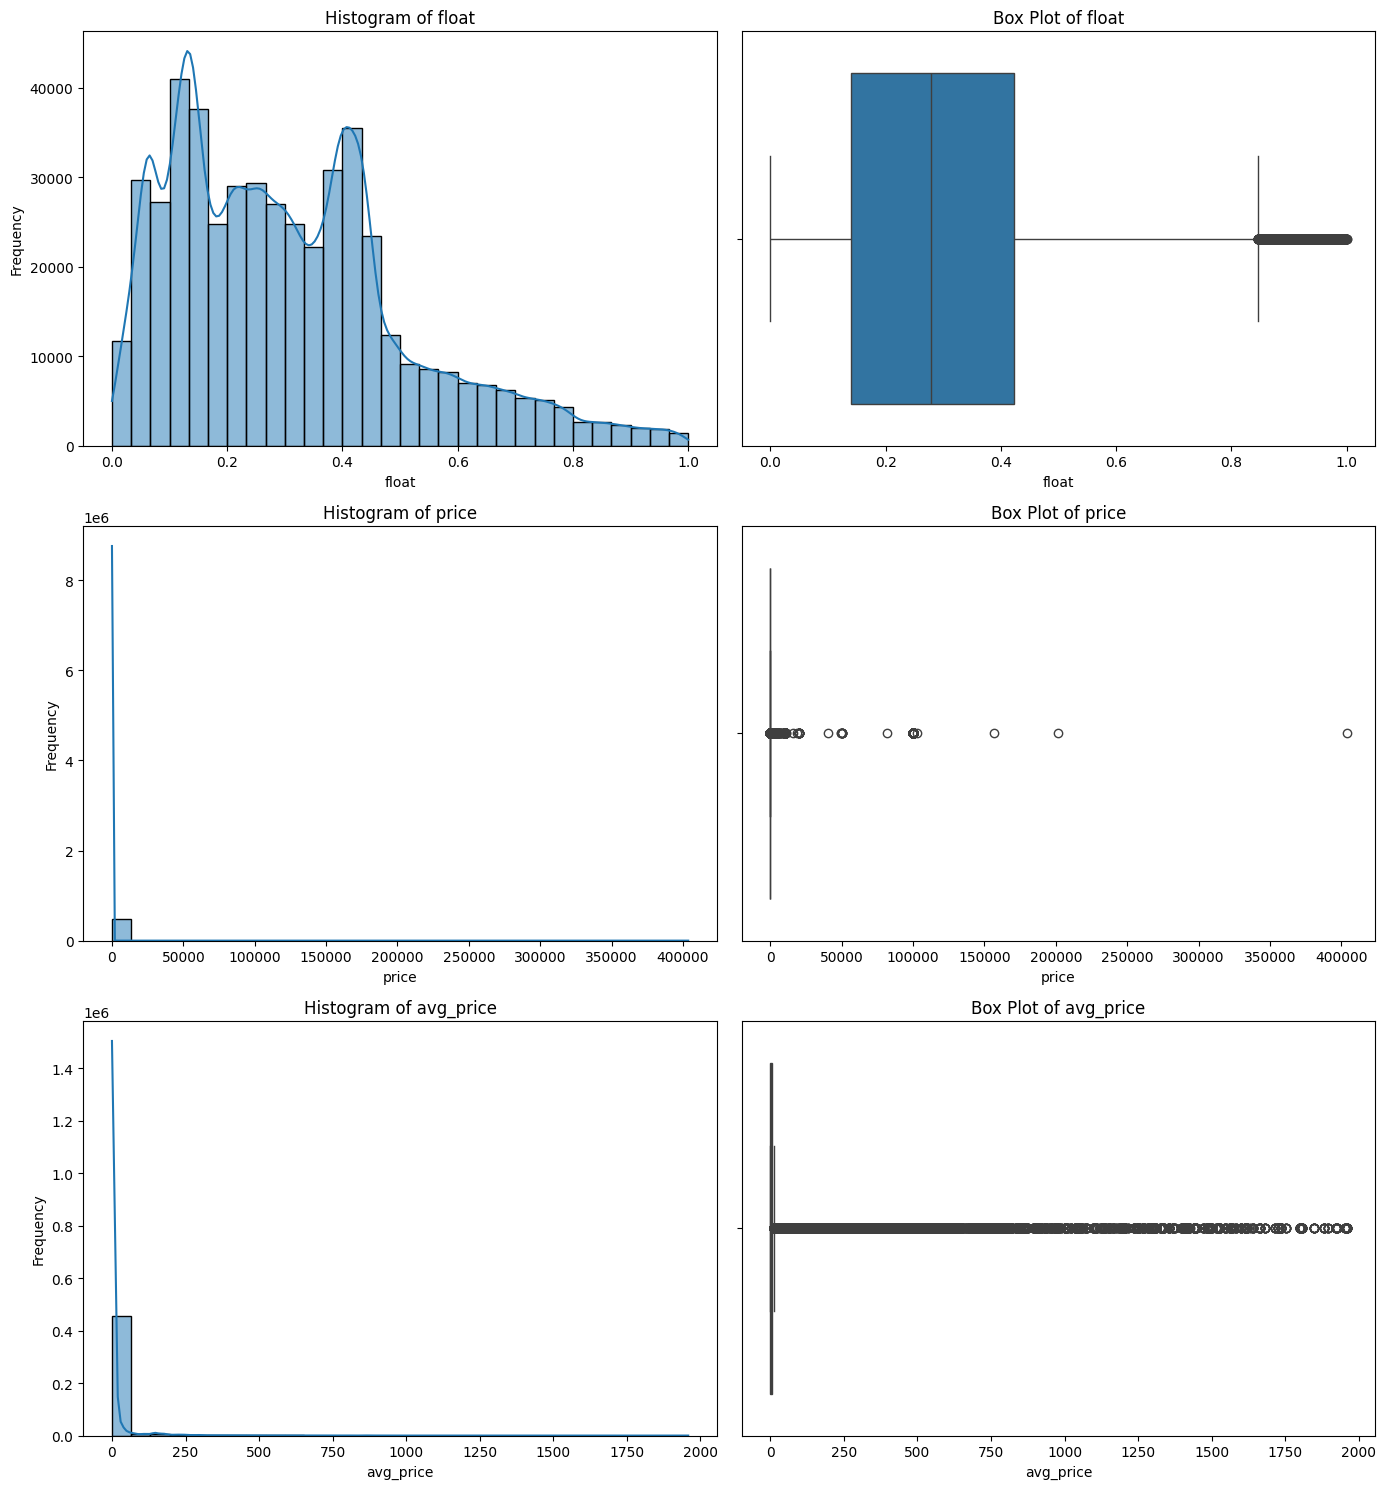

In [193]:
numerical_columns = ['float', 'price', 'avg_price']

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(14, 5 * len(numerical_columns)))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df_items[column], bins=30, kde=True, ax=axes[2*i])
    axes[2*i].set_title(f'Histogram of {column}')
    axes[2*i].set_xlabel(column)
    axes[2*i].set_ylabel('Frequency')
    
    # Box plot
    sns.boxplot(x=df_items[column], ax=axes[2*i + 1])
    axes[2*i + 1].set_title(f'Box Plot of {column}')
    axes[2*i + 1].set_xlabel(column)

plt.tight_layout()
plt.show()

Some of the plots are poorly descriptive, so lets change the scope to show prices thath only <= the mean value of the `price` field.

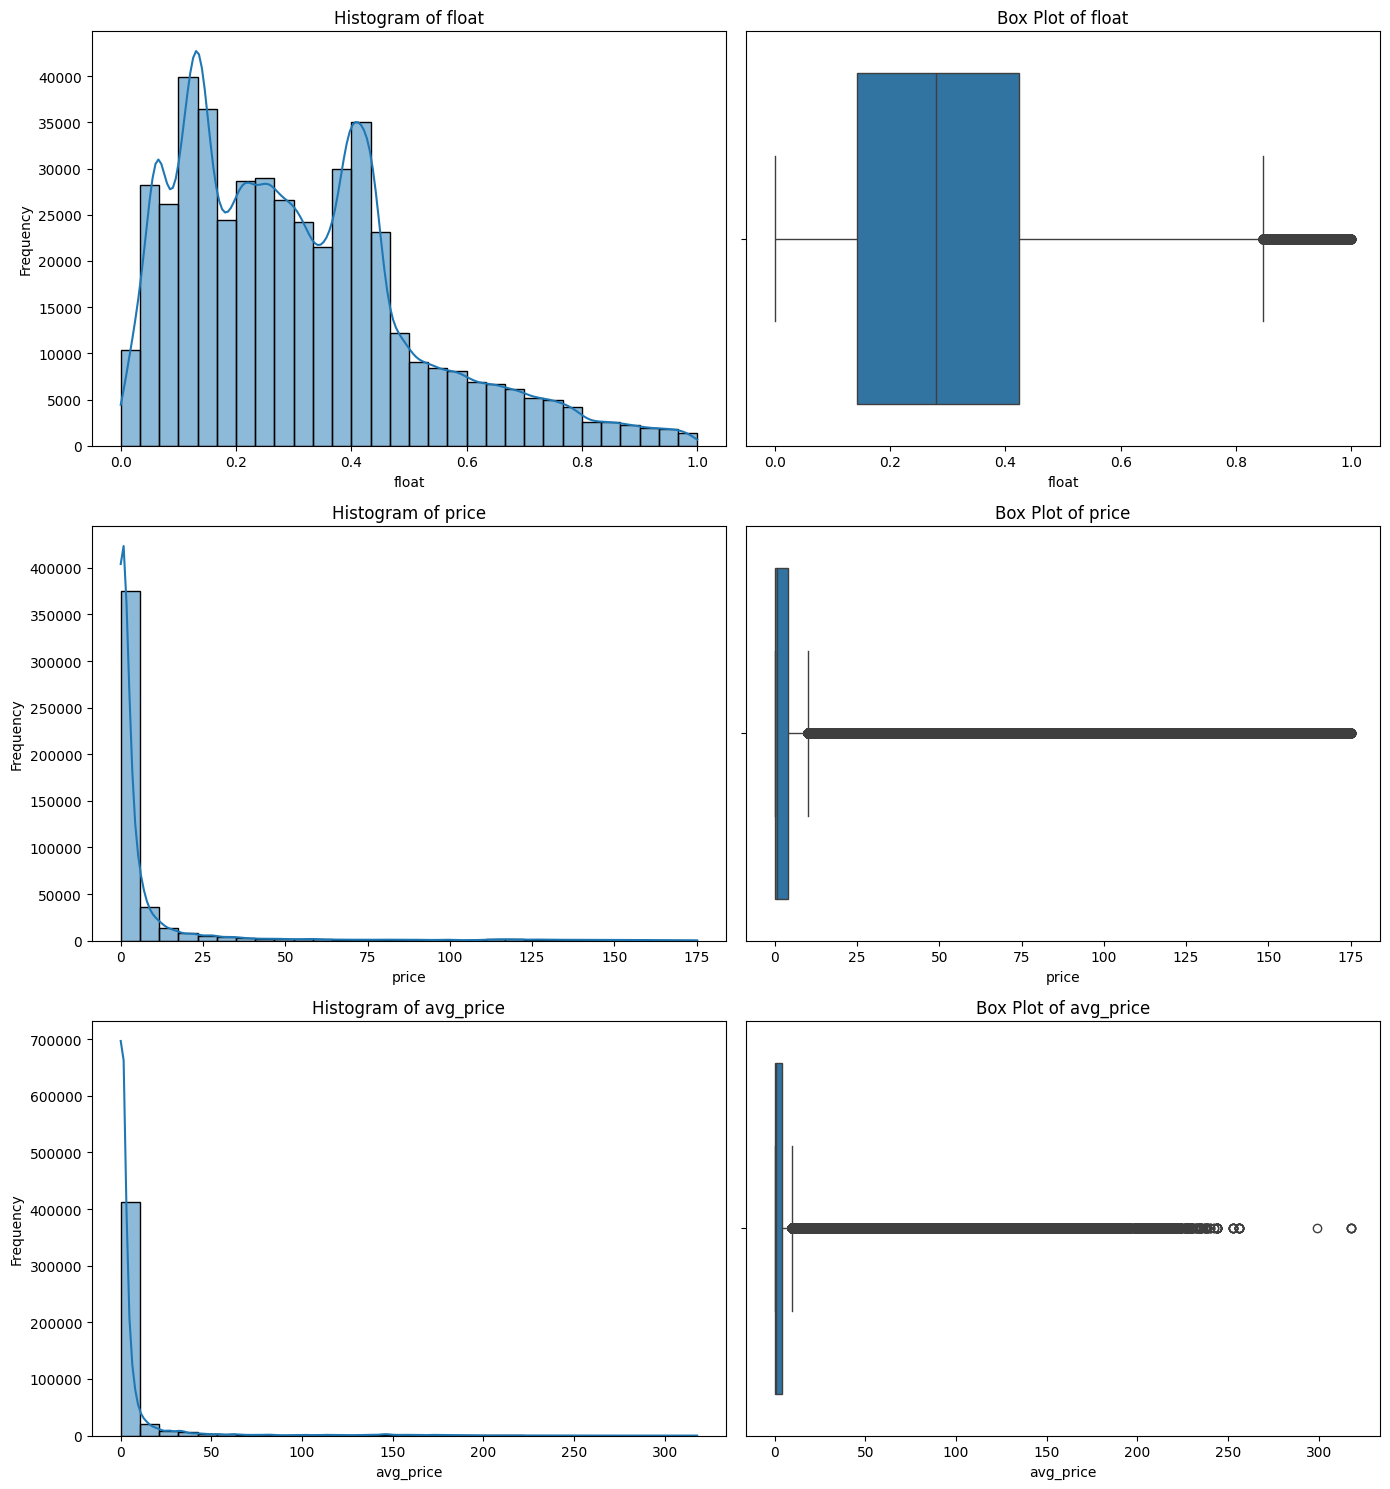

In [194]:


df_items_filtered = df_items.copy()

df_items_filtered = df_items_filtered[df_items_filtered['price'] <= df_items_filtered['price'].mean()]

numerical_columns = ['float', 'price', 'avg_price']

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(14, 5 * len(numerical_columns)))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df_items_filtered[column], bins=30, kde=True, ax=axes[2*i])
    axes[2*i].set_title(f'Histogram of {column}')
    axes[2*i].set_xlabel(column)
    axes[2*i].set_ylabel('Frequency')
    
    # Box plot
    sns.boxplot(x=df_items_filtered[column], ax=axes[2*i + 1])
    axes[2*i + 1].set_title(f'Box Plot of {column}')
    axes[2*i + 1].set_xlabel(column)

plt.tight_layout()
plt.show()


1. **`float`**: Primarily distributed between 0 and 0.5, with a few high-value outliers. The distribution is slightly bimodal with peaks around 0.1 and 0.3.

2. **`price`**: Highly right-skewed, with most values near zero and many high-value outliers. This indicates a few items with very high prices compared to the majority.

3. **`avg_price`**: Similar to `price`, this column is right-skewed, concentrated at low values, and has a large number of high-value outliers.

**Overall**: `price` and `avg_price` are dominated by low values with rare, extreme outliers. The `float` data shows more balance but still has high-value outliers.

### Step 7: Assessment of Catergorical features

Frequency distribution for type:
type
Pistol          169016
Rifle           129796
SMG              76057
Sniper Rifle     52198
Shotgun          28267
Knife            12552
Machinegun        8304
Gloves            3609
Sticker              1
Graffiti             1
Name: count, dtype: int64


Frequency distribution for market_hash_name:
market_hash_name
MP9 | Slide (Field-Tested)                               3931
AK-47 | Safari Mesh (Field-Tested)                       2930
Glock-18 | High Beam (Factory New)                       2435
AWP | Pit Viper (Field-Tested)                           2232
P250 | Cassette (Field-Tested)                           2158
                                                         ... 
★ Shadow Daggers | Boreal Forest (Battle-Scarred)           1
StatTrak™ MAG-7 | Firestarter (Battle-Scarred)              1
★ Bowie Knife | Damascus Steel (Battle-Scarred)             1
G3SG1 | Contractor (Battle-Scarred)                         1
★ StatTrak™ Classic Kn

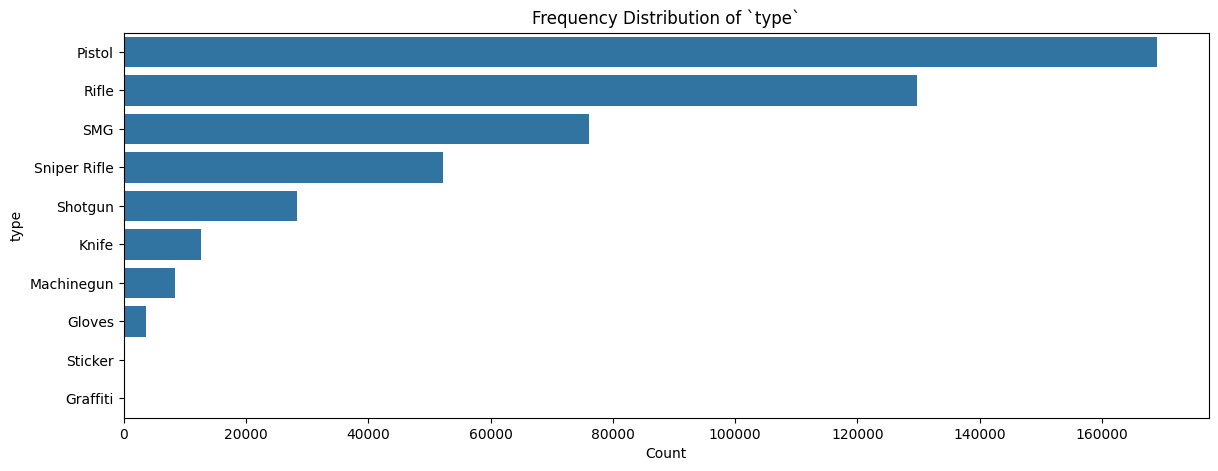

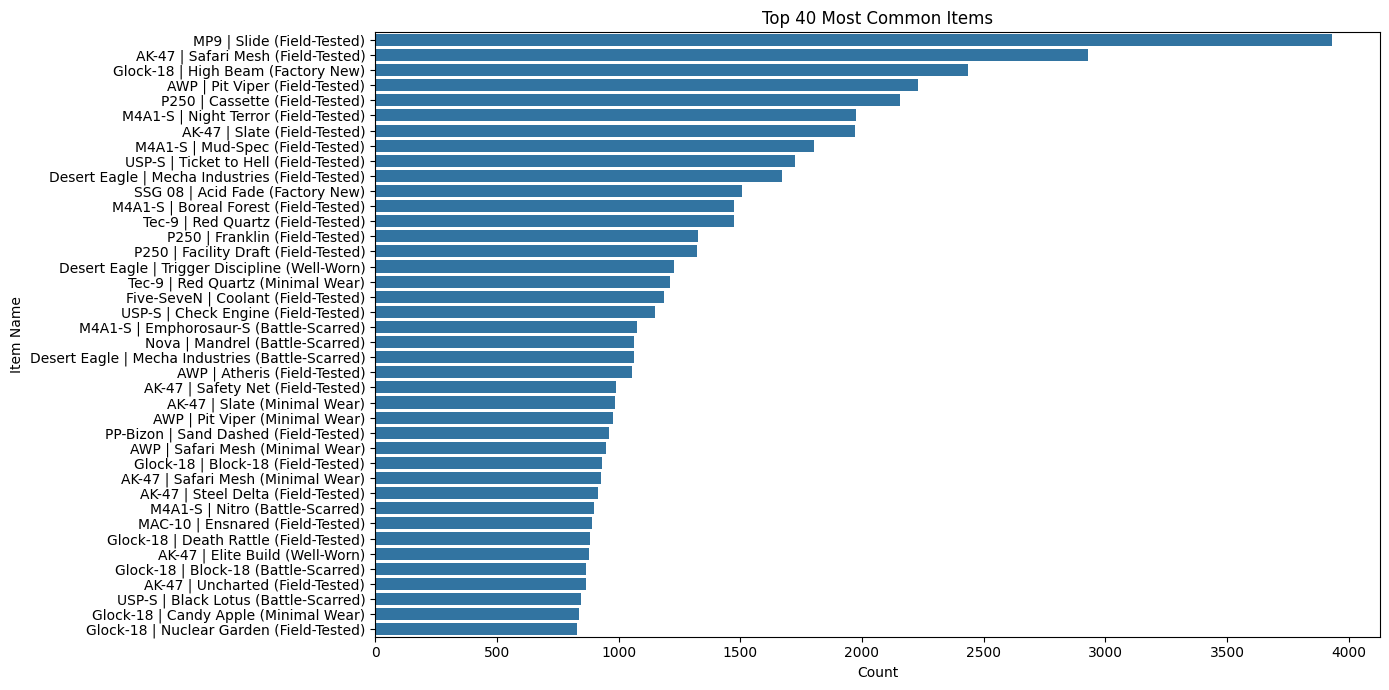

In [195]:
categorical_columns = ['type', 'market_hash_name']

for column in categorical_columns:
    print(f"Frequency distribution for {column}:")
    print(df_items[column].value_counts())
    print("\n")

fig, ax = plt.subplots(figsize=(14, 5))

sns.countplot(y=df_items['type'], ax=ax, order=df_items['type'].value_counts().index)
ax.set_title('Frequency Distribution of `type`')
ax.set_xlabel('Count')
ax.set_ylabel('type')




top_40_items = df_items['market_hash_name'].value_counts().head(40)

fig, ax = plt.subplots(figsize=(14, 7))

sns.barplot(x=top_40_items.values, y=top_40_items.index, ax=ax)
ax.set_title('Top 40 Most Common Items')
ax.set_xlabel('Count')
ax.set_ylabel('Item Name')


plt.tight_layout()
plt.show()

We skipped most of the values in a categorical feature of `market_hash_name` because, as we saw in the previous analysis, there are over 20k unique values. We plotted the top items by frequency so there is somewhat of an understanding when it comes to data frequency distribution.

### Step 8: Analysis of numerical features

In [196]:
numerical_stats = df_items[numerical_columns].describe().T

numerical_stats['median'] = df_items[numerical_columns].median()

numerical_stats['std'] = df_items[numerical_columns].std()

numerical_stats

,count,mean,std,min,25%,50%,75%,max,median
float,479801.0,0.309327,0.204256,0.000018,0.140345,0.278596,0.422932,0.999871,0.278596
price,479801.0,175.165167,3954.944341,0.006000,0.202000,0.899000,4.717000,403698.802000,0.899000
avg_price,479801.0,18.171776,92.009933,0.030000,0.150000,0.900000,4.500000,1958.260000,0.900000



1. **`float`**: 
   - **Skewed right** with most values below 0.5 and a few high outliers. Mean (0.31) and median (0.27) are close, indicating moderate skewness.

2. **`price`**:
   - **Highly right-skewed** with most values near zero and extreme outliers. Mean (33.33) is much higher than the median (1.09) due to high-value items.

3. **`avg_price`**:
   - **Similar to `price`**, heavily right-skewed. Mean (17.52) is much higher than the median (0.91), reflecting a few expensive outliers.

All three features are right-skewed, with `price` and `avg_price` showing extreme skew due to high-value outliers.

### Step 9: Correlation analysis

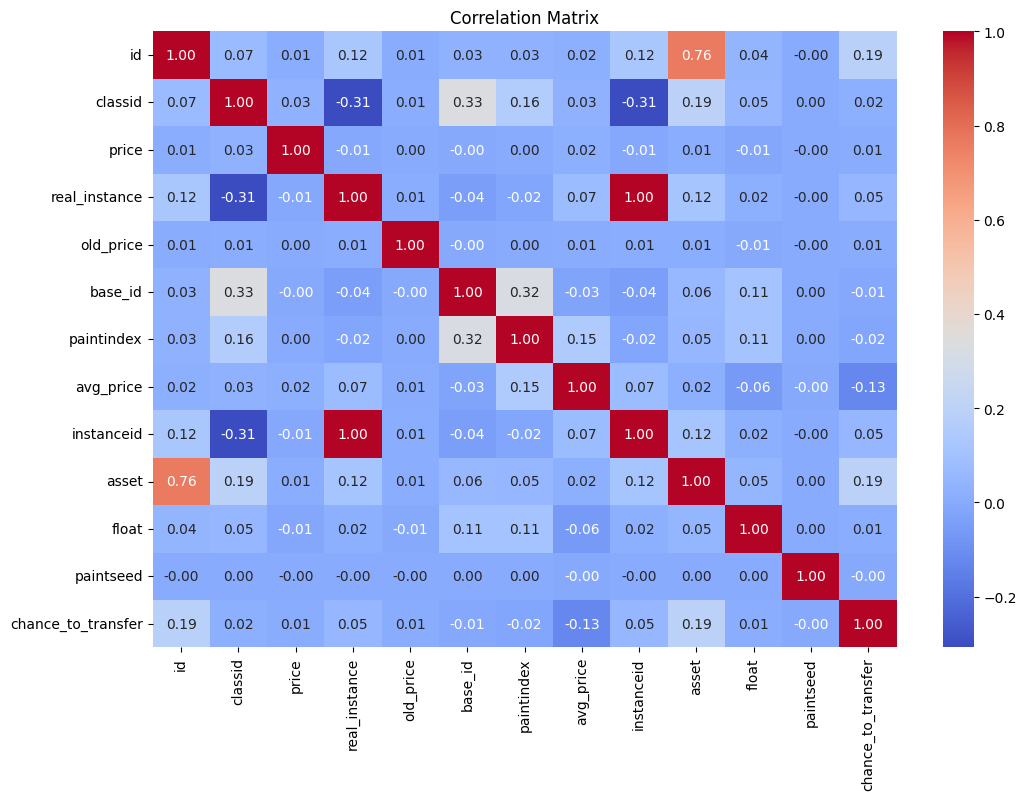

In [197]:
numeric_df_items = df_items.select_dtypes(include=[float, int])
correlation_matrix = numeric_df_items.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

1. **`paintindex` as a Proxy for Visual Uniqueness**:
   - `paintindex`, which might represent unique visual patterns or skins, has a weak positive correlation with `avg_price` (0.159). This suggests that visually unique items tend to have slightly higher average prices, similar to how rare or desirable stickers might increase an item's value.
   - For `price`, the correlation is very low (0.012), indicating minimal impact on the immediate listing price, though unique appearances could influence longer-term pricing averages.

2. **`float` (Condition)**:
   - `float`, representing the wear level of an item, has a weak negative correlation with both `price` and `avg_price`. Items in better condition (lower `float` values) tend to have slightly higher prices. Stickers might also similarly enhance perceived quality, though this effect is minor in the given data.


### Step 10: Outliers Analysis

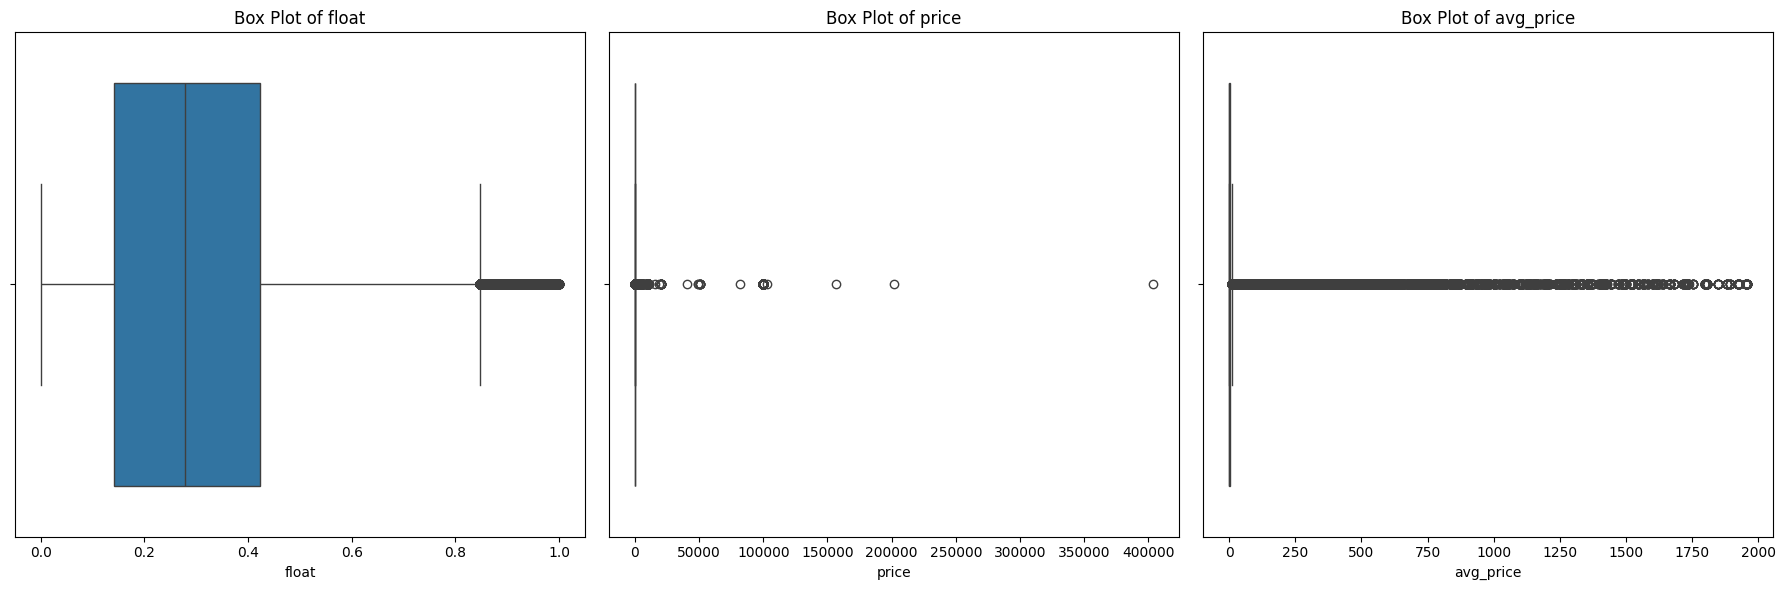

Количество выбросов в каждом столбце:
float         9085
price        69660
avg_price    63658
dtype: int64
Размер данных до удаления выбросов: (479801, 18)
Размер данных после удаления выбросов: (397263, 18)


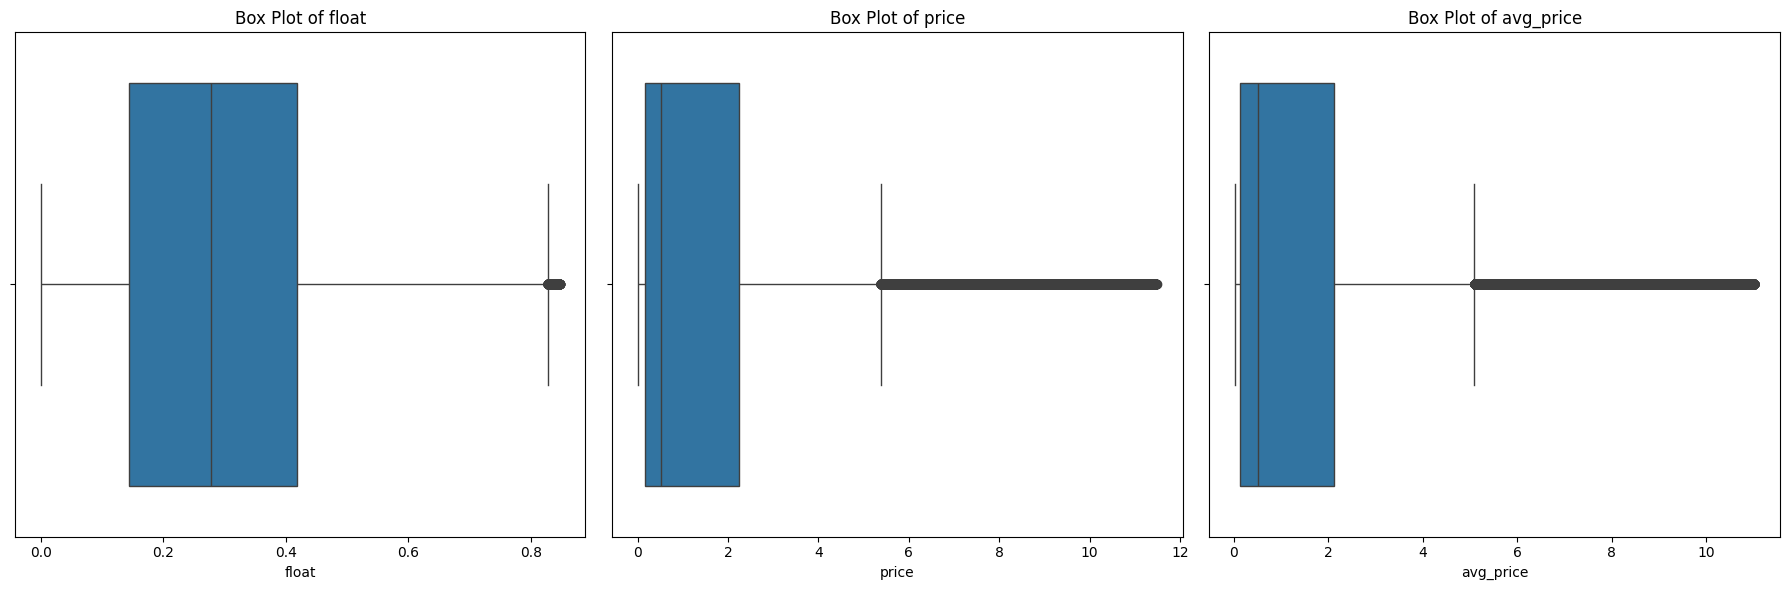

In [198]:
# Визуализация выбросов с помощью boxplot для числовых столбцов
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(18, 6))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_items[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

# Расчет межквартильного размаха (IQR) для каждого числового столбца
Q1 = df_items[numerical_columns].quantile(0.25)
Q3 = df_items[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Определение выбросов
outliers = ((df_items[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_items[numerical_columns] > (Q3 + 1.5 * IQR)))

# Подсчет количества выбросов в каждом столбце
outliers_count = outliers.sum()
print("Количество выбросов в каждом столбце:")
print(outliers_count)

# Удаление выбросов
df_items_no_outliers = df_items[~((df_items[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_items[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Проверка размерности данных до и после удаления выбросов
print(f"Размер данных до удаления выбросов: {df_items.shape}")
print(f"Размер данных после удаления выбросов: {df_items_no_outliers.shape}")

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(18, 6))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_items_no_outliers[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

### Step 11: Feature transformation

C:\Users\user\AppData\Local\Temp\ipykernel_11204\593493243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['log_price'] = np.log1p(df_items['price'])
C:\Users\user\AppData\Local\Temp\ipykernel_11204\593493243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['log_avg_price'] = np.log1p(df_items['avg_price'])


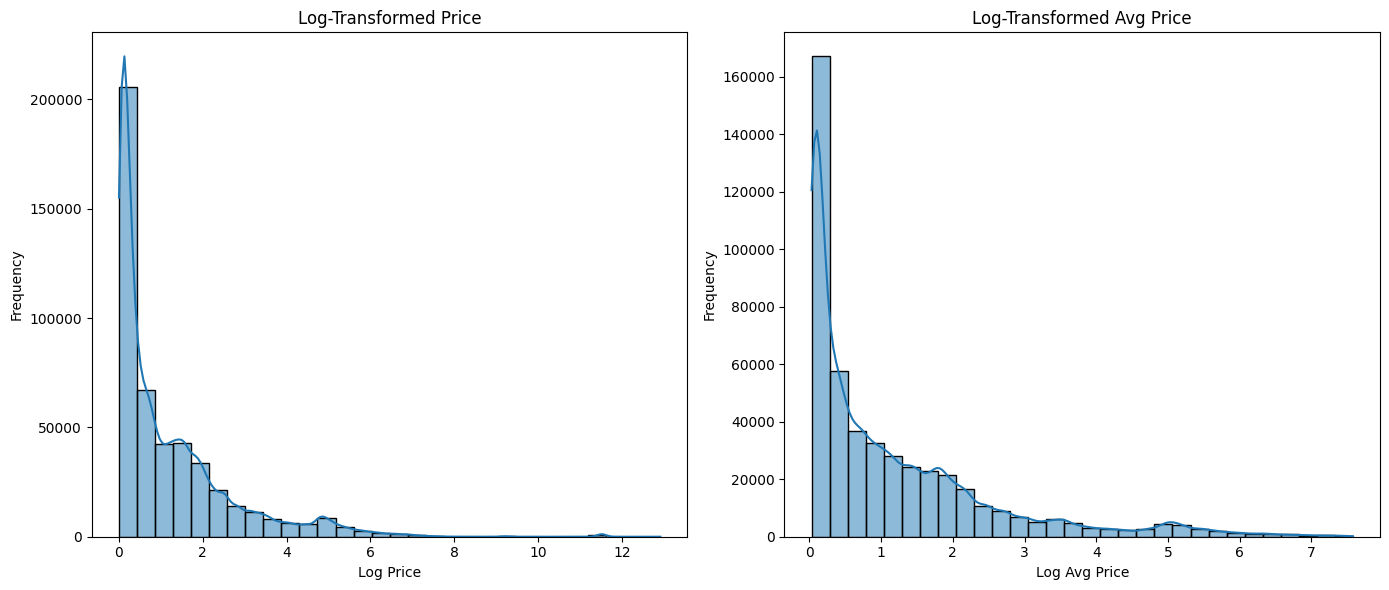

In [199]:
df_items['log_price'] = np.log1p(df_items['price'])
df_items['log_avg_price'] = np.log1p(df_items['avg_price'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.histplot(df_items['log_price'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Log-Transformed Price')
axes[0].set_xlabel('Log Price')
axes[0].set_ylabel('Frequency')

sns.histplot(df_items['log_avg_price'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Log-Transformed Avg Price')
axes[1].set_xlabel('Log Avg Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

---
As we saw in the previous analysis non of the encoding methods would benefit(OHE - would increase the dimensionality of the table drastically; Label Encoder - our categorical features are not represetned as heirarchy of any sort), so lets skip to another step.

### Step 12: Scaling of numeric features

To bring the features to the same scale, we will use robust standardisation. Robust standardisation involves transforming the data so that it is scaled according to the median and the interquartile range (IQR). This is particularly useful for features that have a large standard deviation and are prone to outliers, as in the case of `price` which has a `std of >899000`!

In [200]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_items['price_standardized'] = scaler.fit_transform(df_items[['price']])

df_items[['price', 'price_standardized']].describe()


C:\Users\user\AppData\Local\Temp\ipykernel_11204\3097538293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['price_standardized'] = scaler.fit_transform(df_items[['price']])


,price,price_standardized
count,479801.000000,479801.000000
mean,175.165167,38.597158
std,3954.944341,875.956665
min,0.006000,-0.197785
25%,0.202000,-0.154374
50%,0.899000,0.000000
75%,4.717000,0.845626
max,403698.802000,89412.603101


The `price` attribute is now standardised and brought to the same scale as other attributes.

### Step 13: Feature engineering

The feature sticker is a categorical feature(string) that cosists of sticker id's seperated by "`|`". We have a seperate dataset (*sticker.csv*) that conists of mapping of sticker_id to market_hash_name and its avg_price. We'll load it and try to create a new feature that would be called `sum_of_sticker_prices`. The name expains itself.

#### Firstly, lets load the dataset

Lets perform a brief analysis of the dataset.


In [201]:
df_stiickers = pd.read_csv(PATH_TO_DATA + "sticker.csv", low_memory=False)
df_stiickers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3056 non-null   int64  
 1   market_hash_name  3056 non-null   object 
 2   avg_price         3056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 71.8+ KB


As we can see no data gaps are found. Thats because we verified integrity of the dataset beforehand in the db.

In [202]:
df_sticker_no_zeros = df_stiickers[df_stiickers['avg_price'] > 0]
median_value_of_sticker = df_sticker_no_zeros["avg_price"].median()

df_stiickers['avg_price'].replace(0, median_value_of_sticker, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11204\3778919814.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_stiickers['avg_price'].replace(0, median_value_of_sticker, inplace=True)


#### Secondly, we need to write a function to parse the sticker ids, create a new feauture and to map it with the corresponding values in the sticker dataset.

In [203]:
def get_avg_sticker_price(sticker_ids, df_stickers):
	if pd.isna(sticker_ids):
		return 0
	ids = sticker_ids.split('|')
	prices = df_stickers[df_stickers['id'].isin(map(int, ids))]['avg_price']
	return prices.sum() if not prices.empty else 0

df_items['sum_sticker_price'] = df_items['stickers'].apply(get_avg_sticker_price, df_stickers=df_stiickers)
df_items.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11204\665571864.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['sum_sticker_price'] = df_items['stickers'].apply(get_avg_sticker_price, df_stickers=df_stiickers)


,id,market_hash_name,classid,price,real_instance,old_price,base_id,phase,paintindex,type,...,asset,stamp,float,paintseed,stickers,chance_to_transfer,log_price,log_avg_price,price_standardized,sum_sticker_price
20,5906181903,P90 | Grim (Well-Worn),6260975890,0.139,188530139,139.0,2026,NaN,611.0,SMG,...,40323304914,2024-11-15 00:17:08,0.401281,867.0,NaN,100.0,0.130151,0.148420,-0.168328,0.00
547,529702123,Souvenir MP5-SD | Lab Rats (Factory New),3106097319,1.666,338584038,0.0,76513,NaN,800.0,SMG,...,15256821968,2024-11-15 00:22:40,0.030103,519.0,1682269663,70.0,0.980579,0.198851,0.169878,5.42
549,541972057,PP-Bizon | Sand Dashed (Field-Tested),310776558,6.056,0,6000.0,33,NaN,148.0,SMG,...,4971806121,2024-11-15 00:22:40,0.167246,948.0,NaN,70.0,1.953878,0.029559,1.142193,0.00
550,541972168,AUG | Condemned (Battle-Scarred),310779217,0.707,302028390,5000.0,39,NaN,110.0,Rifle,...,14477924513,2024-11-15 00:02:47,0.659919,41.0,NaN,70.0,0.534737,0.048790,-0.042525,0.00
551,541972222,MP7 | Army Recon (Field-Tested),310776668,54.399,0,39000.0,55,NaN,245.0,SMG,...,14938633170,2024-11-15 00:22:40,0.232036,296.0,NaN,70.0,4.014562,0.029559,11.849391,0.00


It took a while because of the size of the datasets and lack of hash indexies. Nevertheless, we got our new feature called `sum_of_stickers`!

### Step 14: Removal of irrelevant features

The id is a unique value that is composite of classid, asset, instanceid, base_id and real_instance, so there is no need to keep them all afterall. We could reindex the df making the id field prime index later on.

In [204]:
columns_to_drop = ["instanceid", "base_id", "real_instance", "asset"]
df_items = df_items.drop(columns=[col for col in columns_to_drop if col in df_items.columns])
df_items.head(1)

,id,market_hash_name,classid,price,old_price,phase,paintindex,type,avg_price,stamp,float,paintseed,stickers,chance_to_transfer,log_price,log_avg_price,price_standardized,sum_sticker_price
20,5906181903,P90 | Grim (Well-Worn),6260975890,0.139,139.0,NaN,611.0,SMG,0.16,2024-11-15 00:17:08,0.401281,867.0,NaN,100.0,0.130151,0.14842,-0.168328,0.0


Perfect! Now the dimensionality of the dataset is reduced to 13 columns.

Few columns hold no relevance to our goal and can be excluded. These include:

1. `stamp`: when item was listed, which is not matter to our analysis as this is not time series;
2. `old_price`: this field only displays the previous price set by the user before any adjustments;
3. `chance_to_transfer`: this field provides information about the user who listed the item.

In [205]:
useless_fields = ['old_price', 'stamp', 'chance_to_transfer']
df_items.drop(columns=[col for col in useless_fields if col in df_items.columns], inplace=True)
df_items.head(1)

,id,market_hash_name,classid,price,phase,paintindex,type,avg_price,float,paintseed,stickers,log_price,log_avg_price,price_standardized,sum_sticker_price
20,5906181903,P90 | Grim (Well-Worn),6260975890,0.139,NaN,611.0,SMG,0.16,0.401281,867.0,NaN,0.130151,0.14842,-0.168328,0.0


Our goal is to see how **sticker prices** placed on item affect the **item's price**. The dataset is a listing that consists of all items avialable for purchase as of 24.10.2024.
Some items such as **`Sticker`(obvious one), `Knife`, `Gloves`, `Agent`** cant have stickers placed on them, so lets filter them out.


In [206]:
df_items['type'].value_counts()


type
Pistol          169016
Rifle           129796
SMG              76057
Sniper Rifle     52198
Shotgun          28267
Knife            12552
Machinegun        8304
Gloves            3609
Sticker              1
Graffiti             1
Name: count, dtype: int64

In [207]:
types_to_delete = ['Knife', 'Gloves', 'Agent', 'Sticker', 'Container', 'Graffiti', 'Music Kit',
                    'Patch', 'Tag', 'Key', 'Pass', 'Collectible', 'Charm', 'Equipment', 'Tool', 'Gift']
df_items.drop(df_items[df_items['type'].isin(types_to_delete)].index, inplace=True)
df_items['type'].value_counts()


type
Pistol          169016
Rifle           129796
SMG              76057
Sniper Rifle     52198
Shotgun          28267
Machinegun        8304
Name: count, dtype: int64

There are very few items with phase. It is known that phase do indeed affect the price, so lets remove the items with the `phase` value that is not NaN. Afterwards lets drop the useless column.

In [208]:
df_items = df_items[df_items['phase'].isna()]

df_items = df_items.drop(columns=['phase'])

df_items.head()

,id,market_hash_name,classid,price,paintindex,type,avg_price,float,paintseed,stickers,log_price,log_avg_price,price_standardized,sum_sticker_price
20,5906181903,P90 | Grim (Well-Worn),6260975890,0.139,611.0,SMG,0.16,0.401281,867.0,NaN,0.130151,0.148420,-0.168328,0.00
547,529702123,Souvenir MP5-SD | Lab Rats (Factory New),3106097319,1.666,800.0,SMG,0.22,0.030103,519.0,1682269663,0.980579,0.198851,0.169878,5.42
549,541972057,PP-Bizon | Sand Dashed (Field-Tested),310776558,6.056,148.0,SMG,0.03,0.167246,948.0,NaN,1.953878,0.029559,1.142193,0.00
550,541972168,AUG | Condemned (Battle-Scarred),310779217,0.707,110.0,Rifle,0.05,0.659919,41.0,NaN,0.534737,0.048790,-0.042525,0.00
551,541972222,MP7 | Army Recon (Field-Tested),310776668,54.399,245.0,SMG,0.03,0.232036,296.0,NaN,4.014562,0.029559,11.849391,0.00


Also, the paintindex in comination with paintseed do affect price, but only in very rare instances. We could remove the said features.

In [209]:
df_items = df_items.drop(columns=['paintseed', 'paintindex'])

Awesome! Now we have a clean dataset with only the necessary columns. Let's move on to the next step: data analysis and visualization. We will create some plots to explore the relationships between different variables in the dataset.

### Step 15: Data visualization

#### Analyzing the relation of sticker price on skin and price of a listing

In [210]:
df_items.head(5)

,id,market_hash_name,classid,price,type,avg_price,float,stickers,log_price,log_avg_price,price_standardized,sum_sticker_price
20,5906181903,P90 | Grim (Well-Worn),6260975890,0.139,SMG,0.16,0.401281,NaN,0.130151,0.148420,-0.168328,0.00
547,529702123,Souvenir MP5-SD | Lab Rats (Factory New),3106097319,1.666,SMG,0.22,0.030103,1682269663,0.980579,0.198851,0.169878,5.42
549,541972057,PP-Bizon | Sand Dashed (Field-Tested),310776558,6.056,SMG,0.03,0.167246,NaN,1.953878,0.029559,1.142193,0.00
550,541972168,AUG | Condemned (Battle-Scarred),310779217,0.707,Rifle,0.05,0.659919,NaN,0.534737,0.048790,-0.042525,0.00
551,541972222,MP7 | Army Recon (Field-Tested),310776668,54.399,SMG,0.03,0.232036,NaN,4.014562,0.029559,11.849391,0.00


To remove data anomalies we will keep only items where the sum of the "sticker" price and 1.5 * average price is greater than or equal to the actual price. This helps filter for items 
with a justified price.

In [211]:
df_items_no_out = df_items[(df_items['sum_sticker_price'] + df_items['avg_price']*1.5) >= (df_items['price'])]
df_items_no_out

,id,market_hash_name,classid,price,type,avg_price,float,stickers,log_price,log_avg_price,price_standardized,sum_sticker_price
20,5906181903,P90 | Grim (Well-Worn),6260975890,0.139,SMG,0.16,0.401281,NaN,0.130151,0.148420,-0.168328,0.00
547,529702123,Souvenir MP5-SD | Lab Rats (Factory New),3106097319,1.666,SMG,0.22,0.030103,1682269663,0.980579,0.198851,0.169878,5.42
564,563236899,StatTrak™ AWP | Phobos (Minimal Wear),2149925612,16.226,Sniper Rifle,5.09,0.127713,61599217|114081|62307718|278020969,2.846420,1.806648,3.394684,27.54
603,572594115,AK-47 | Safari Mesh (Field-Tested),1394261111,5.047,Rifle,0.07,0.259184,273096,1.799562,0.067659,0.918715,9.78
624,577779081,P2000 | Granite Marbleized (Field-Tested),1358802960,2.019,Pistol,0.05,0.154857,7468,1.104926,0.048790,0.248062,10.29
...,...,...,...,...,...,...,...,...,...,...,...,...
954566,5908578319,Negev | Boroque Sand (Minimal Wear),3608083957,1.898,Machinegun,2.34,0.086395,NaN,1.064021,1.205971,0.221262,0.00
954567,5908578327,Galil AR | Crimson Tsunami (Well-Worn),2220039157,1.565,Rifle,1.74,0.437021,NaN,0.941958,1.007958,0.147508,0.00
954569,5908578343,CZ75-Auto | Green Plaid (Minimal Wear),519982703,3.937,Pistol,4.12,0.123855,NaN,1.596758,1.633154,0.672868,0.00
954570,5908578351,Galil AR | Crimson Tsunami (Field-Tested),2220041623,1.262,Rifle,1.75,0.245613,18255840860,0.816249,1.011601,0.080399,0.00


Filter items with a `sum_sticker_price` price between 0 and 10,000 and calculate `overpay` as the difference between actual and average price; plot `overpay` versus `sum_sticker_price` for items with positive `overpay` and add a trendline for visualization.

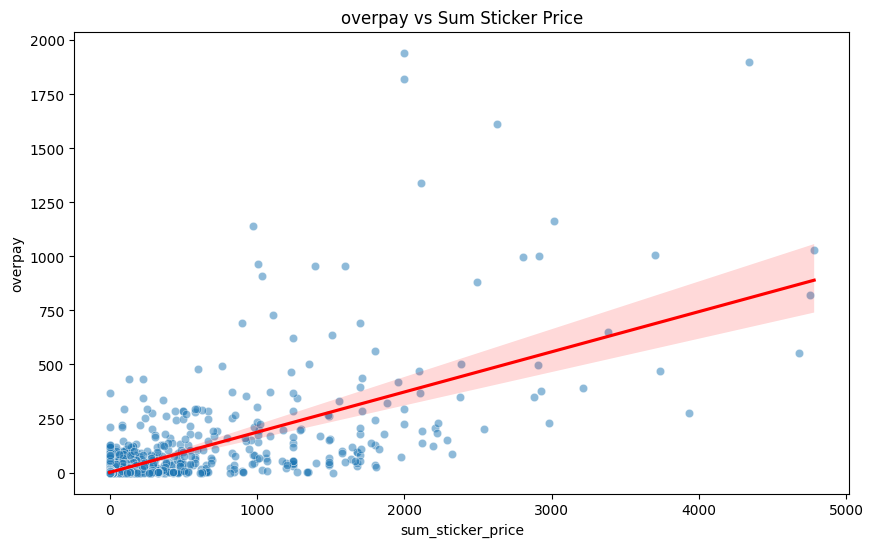

In [212]:
df_items_no_out_filtered = df_items_no_out[(df_items_no_out['sum_sticker_price'] > 0) & (df_items_no_out['sum_sticker_price'] < 10000)].copy()
df_items_no_out_filtered['overpay'] = df_items_no_out_filtered['price'] - df_items_no_out_filtered['avg_price']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sum_sticker_price', y='overpay', data=df_items_no_out_filtered[df_items_no_out_filtered['overpay'] >= 0], alpha=0.5)
plt.xlabel('Sum Sticker Price')
plt.ylabel('overpay')
plt.title('overpay vs Sum Sticker Price')
# Add a trendline
sns.regplot(x='sum_sticker_price', y='overpay', data=df_items_no_out_filtered[df_items_no_out_filtered['overpay'] >= 0], scatter=False, color='red')
plt.show()


Good, we can see how our theory about increasing overpay based on sticker price is holding up.

Let’s create plots to analyze the relationship between the price and the total sticker cost for the 12 most popular items with stickers. This visualization will show how an item's price may depend on the cost of the stickers applied to it, which can help identify trends in the popularity of stickered items and their price dynamics.


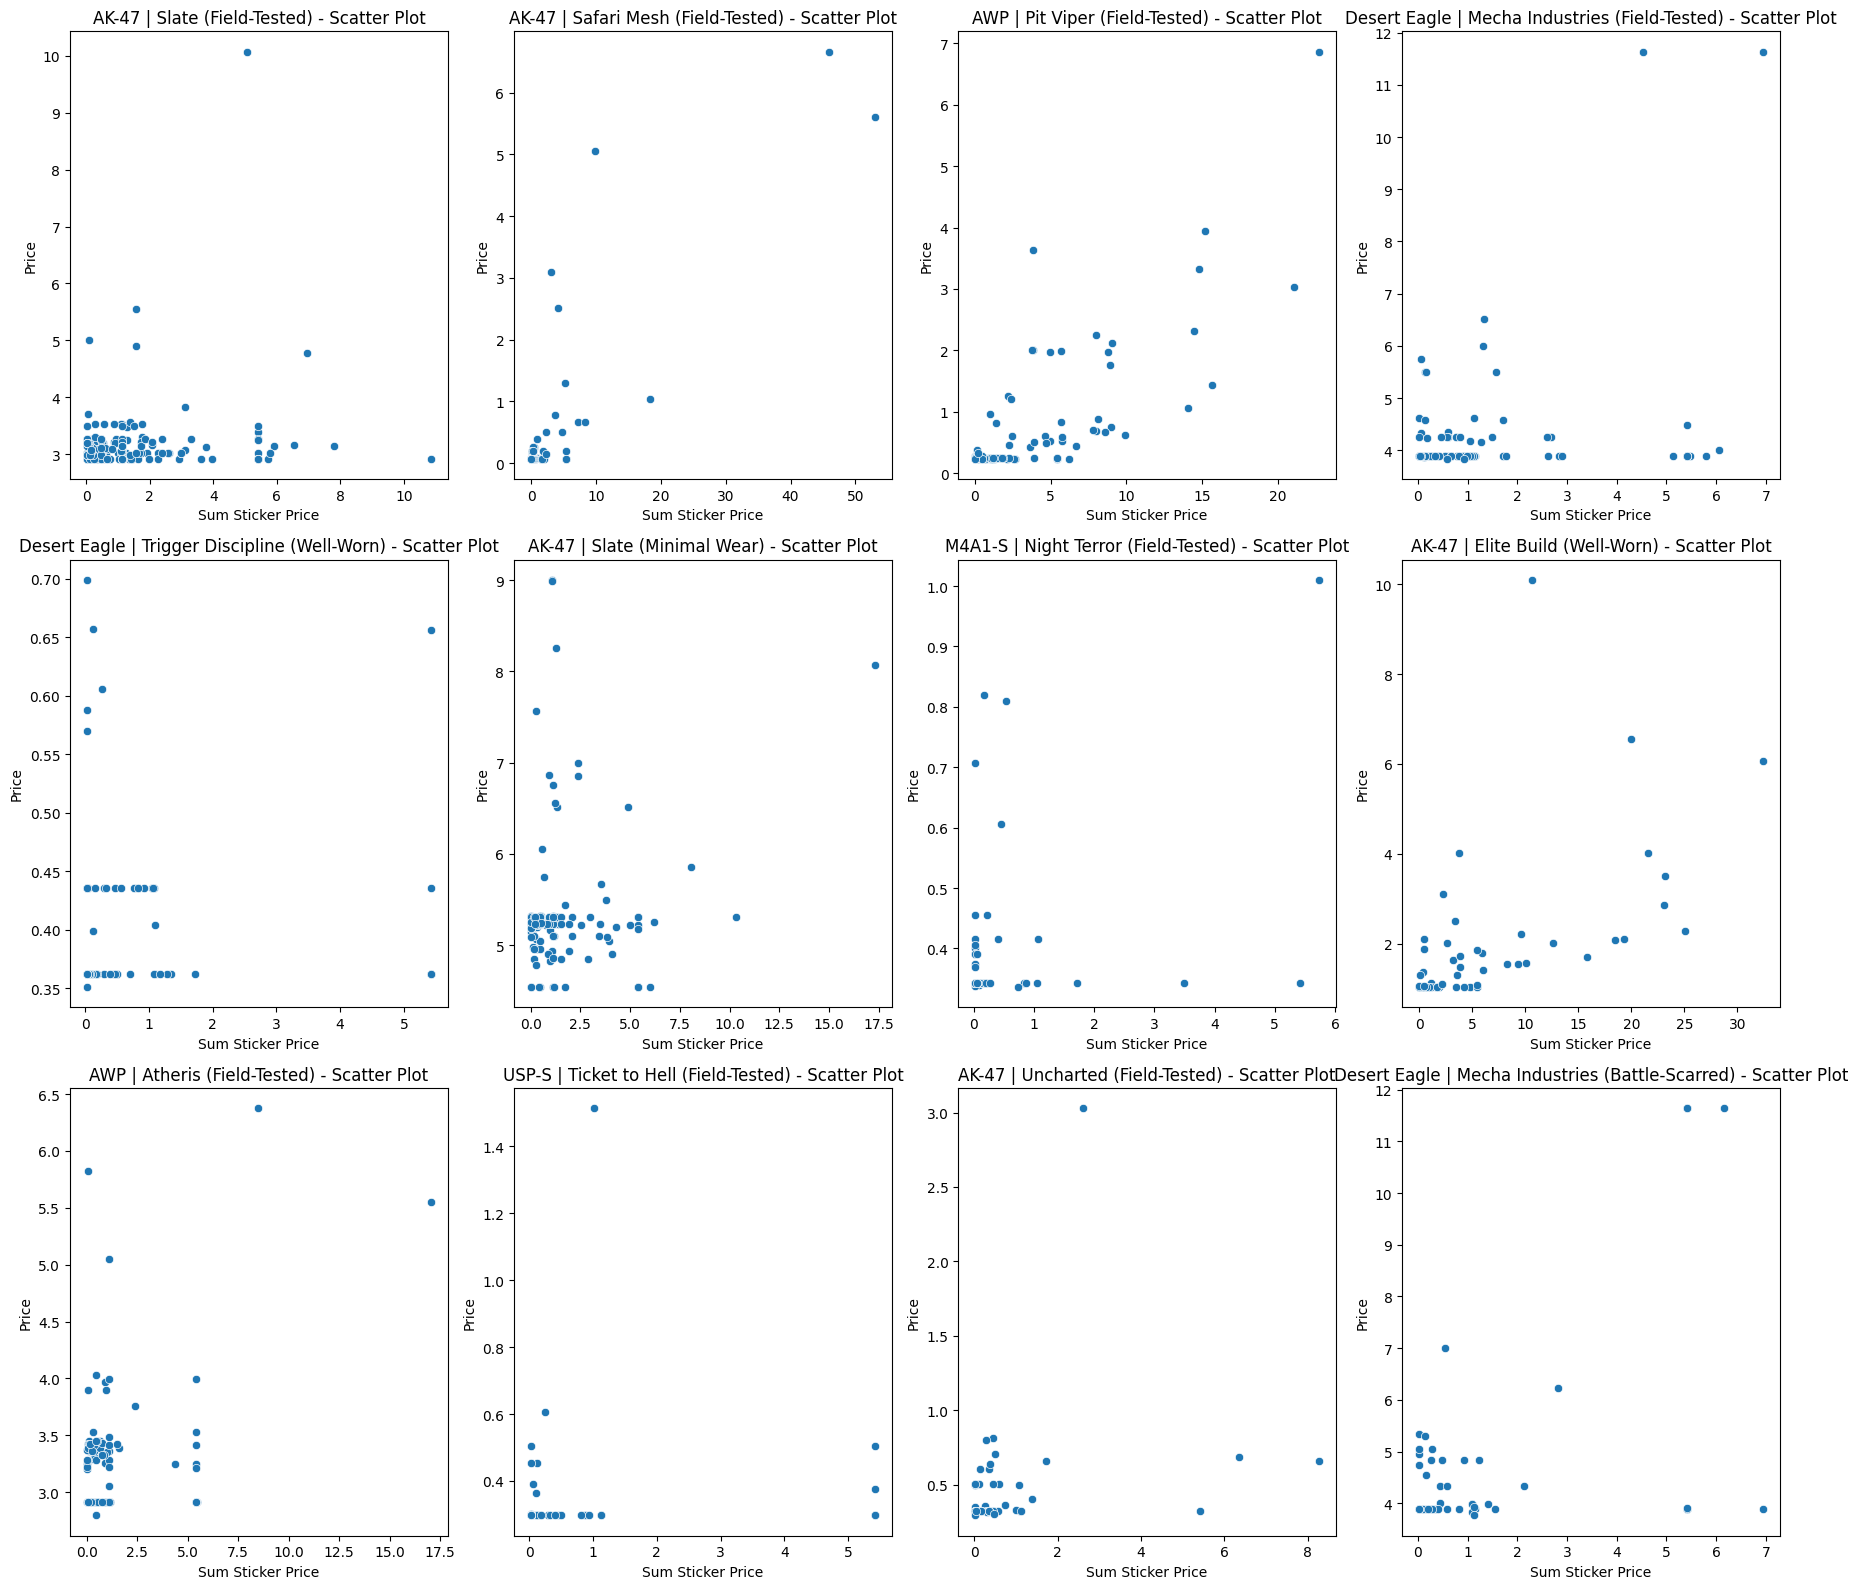

In [213]:
top_12_popular_names_with_stickers = df_items_no_out[df_items_no_out['stickers'].notna() & ~(df_items_no_out['market_hash_name'].str.contains("Souvenir"))]['market_hash_name'].value_counts().head(12).index
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 16))
axes = axes.flatten()

for i, item in enumerate(top_12_popular_names_with_stickers):
    item_data = df_items_no_out[df_items_no_out['market_hash_name'] == item]
    item_data = item_data[item_data['sum_sticker_price'] > 0]
    
    sns.scatterplot(x='sum_sticker_price', y='price', data=item_data, ax=axes[i])
    axes[i].set_title(f'{item} - Scatter Plot')
    axes[i].set_xlabel('Sum Sticker Price')
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

As you can see, overall, `stickers tend to increase` the price of the items.

Now we will create barplot with average price for all items, comparing those with stickers to those without, including only items that are present in the dataset both with and without stickers. 

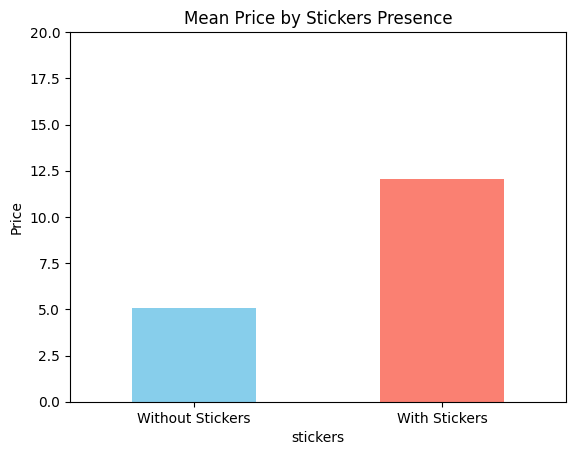

In [214]:
items_filtered_without_stickers = df_items_no_out[df_items_no_out['stickers'].isna()]['market_hash_name'].unique()
items_filtered_with_stickers = df_items_no_out[df_items_no_out['stickers'].notna()]['market_hash_name'].unique()

df_filtered = df_items_no_out[df_items_no_out['market_hash_name'].isin(items_filtered_without_stickers) & df_items_no_out['market_hash_name'].isin(items_filtered_with_stickers)].copy()

avg_price_by_sticker = df_filtered.groupby(df_filtered['stickers'].notna())['price'].mean()

avg_price_by_sticker.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Without Stickers', 'With Stickers'], rotation=0)
plt.ylabel('Price')
plt.title('Mean Price by Stickers Presence')
plt.ylim(0,20) 
plt.show()

Items with stickers cost considerably more.

Let's see how many items we have with and without stickers:

In [215]:
items_with_stickers = df_items_no_out['stickers'].notna().sum()
items_without_stickers = df_items_no_out['stickers'].isna().sum()

print(f"Items with stickers: {items_with_stickers}")
print(f"Items without stickers: {items_without_stickers}")

Items with stickers: 119318
Items without stickers: 264216


There are twice as few items without stickers on sale.

Let's take a closer look at a particular item called `AK-47 | Slate (Field-Tested)`. It is one of the most popular items in the dataset and is one of the most popular items for placing stickers. We can further examine the effect of sticker price on the item on this item.

In [216]:
item_to_selecet = "AK-47 | Slate (Field-Tested)"
ak47_slate = df_items_no_out[df_items_no_out['market_hash_name'] == item_to_selecet]
ak47_slate_with_stickers = ak47_slate[ak47_slate['stickers'].notna()].shape[0]
ak47_slate_without_stickers = ak47_slate[ak47_slate['stickers'].isna()].shape[0]
print(f'{item_to_selecet} with stickers: {ak47_slate_with_stickers}\n{item_to_selecet} without stickers: {ak47_slate_without_stickers}')

AK-47 | Slate (Field-Tested) with stickers: 1469
AK-47 | Slate (Field-Tested) without stickers: 286


There are more items with stickers and they're more expensive.

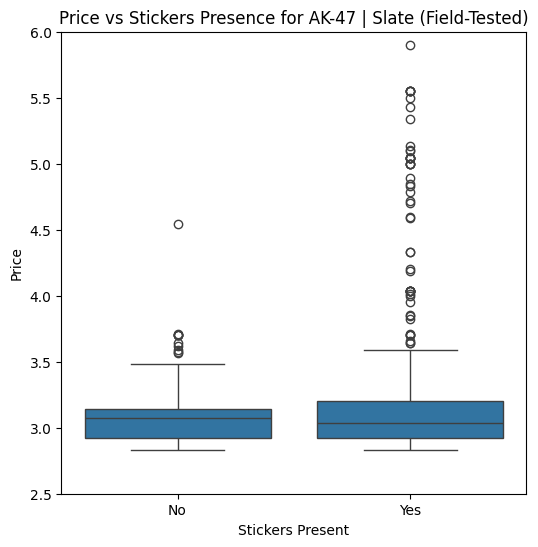

In [217]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=ak47_slate['stickers'].notna(), y='price', data=ak47_slate)
plt.title('Price vs Stickers Presence for AK-47 | Slate (Field-Tested)')
plt.xlabel('Stickers Present')
plt.ylabel('Price')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylim(2.5, 6)
plt.show()

As we can see, the IQRs of both No and Yes are somewhat the same, meaning that the most stickers do not boost the item's cost, but as we can see on the max marks and the amount of outliers, we can assume that some stickers do affect the cost. The median line also suggests that the price is affected in a way.

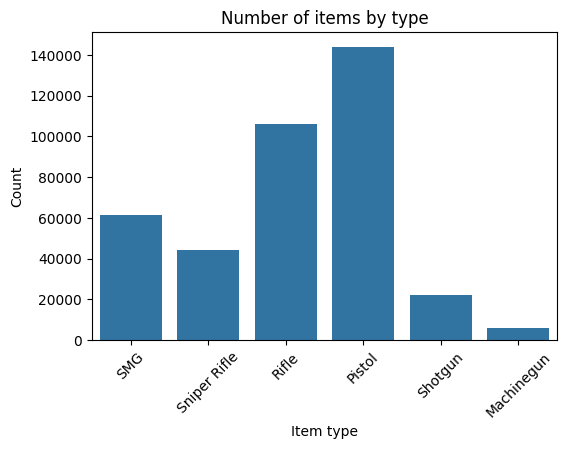

In [218]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df_items_no_out)
plt.title('Number of items by type')
plt.xlabel('Item type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Pistols and rifles are the most common item types, followed by SMGs and sniper rifles with moderate counts. Shotguns and machineguns are the least common, indicating lower availability or demand in the dataset.

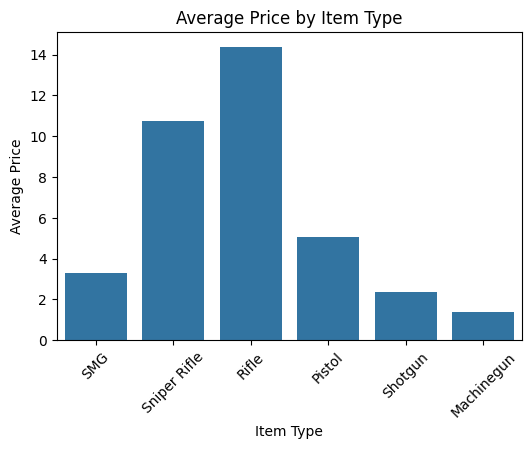

In [219]:
plt.figure(figsize=(6, 4))
sns.barplot(x='type', y='avg_price', data=df_items_no_out, errorbar=None)
plt.title('Average Price by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

Rifles and sniper rifles have the highest average prices, followed by pistols at a moderate price level. Shotguns, SMGs, and machineguns are the least expensive, suggesting that rifles and sniper rifles are more valued in this dataset.

### Analyzing how other features might affect price

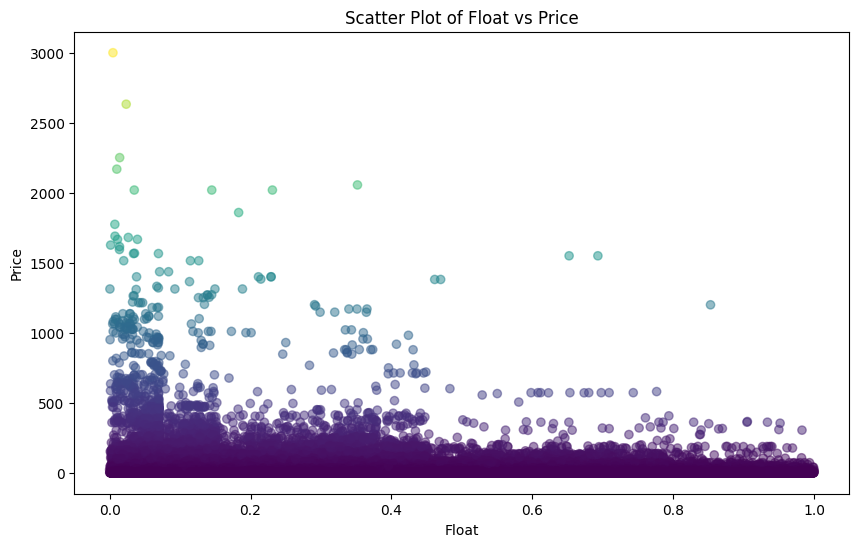

In [220]:
df_with_overpay = df_items_no_out.copy()
df_with_overpay['overpay'] = df_with_overpay['price'] / df_with_overpay['avg_price']

plt.figure(figsize=(10, 6))
plt.scatter(df_with_overpay['float'], df_with_overpay['price'], c=df_with_overpay['price'], cmap='viridis', alpha=0.5)
plt.xlabel('Float')
plt.ylabel('Price')
plt.title('Scatter Plot of Float vs Price')
plt.show()

The scatter plot of float vs price shows that most items with low float values (indicating better condition) have higher prices, though there is a wide spread. A few high-priced outliers exist, especially at low float values, suggesting that items in better condition tend to be more valuable but with some variability in pricing.


Lets take a closer look at different ranges.

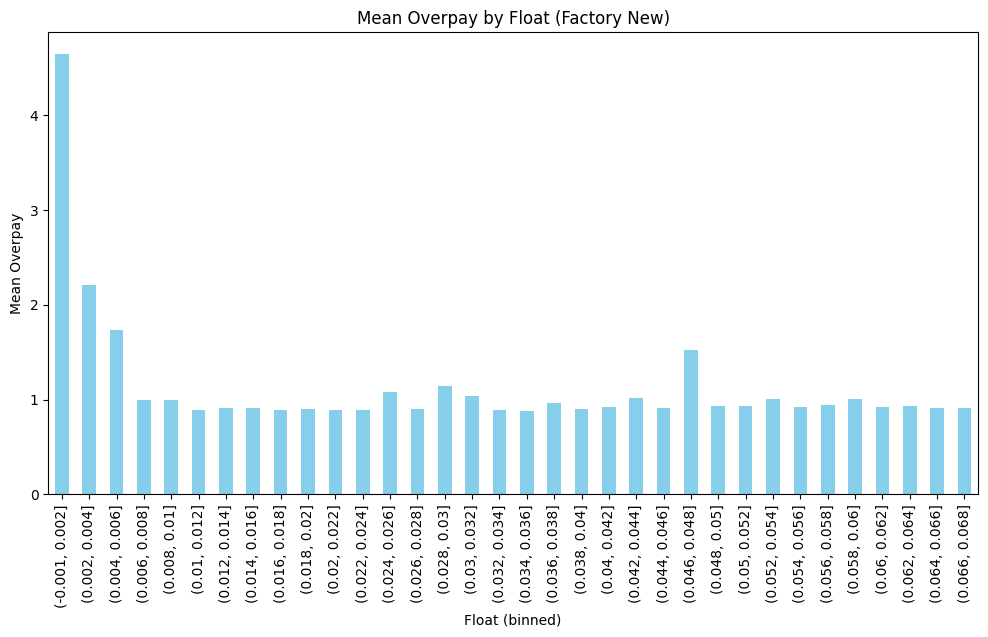

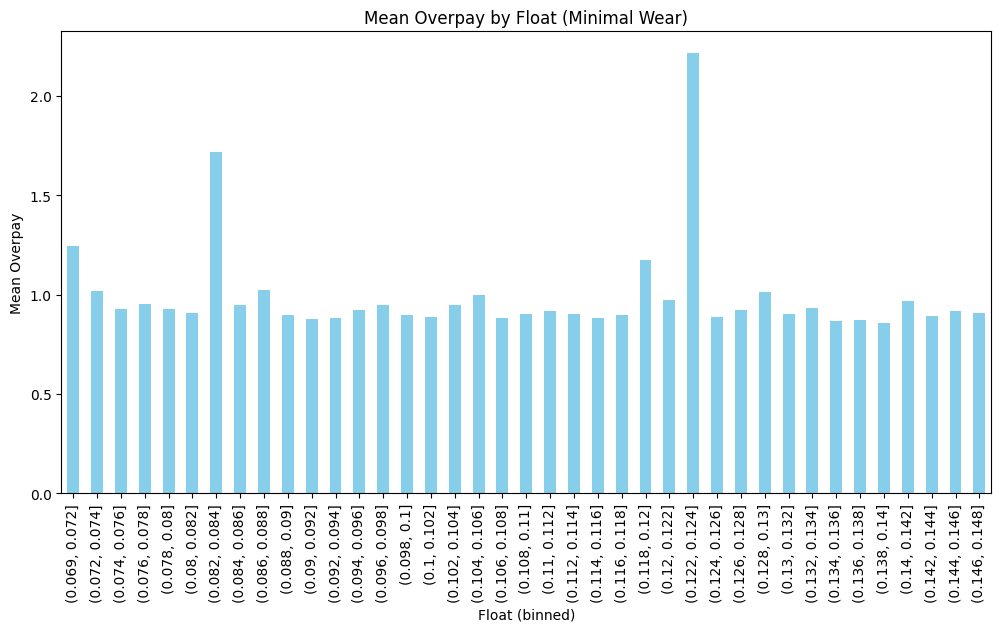

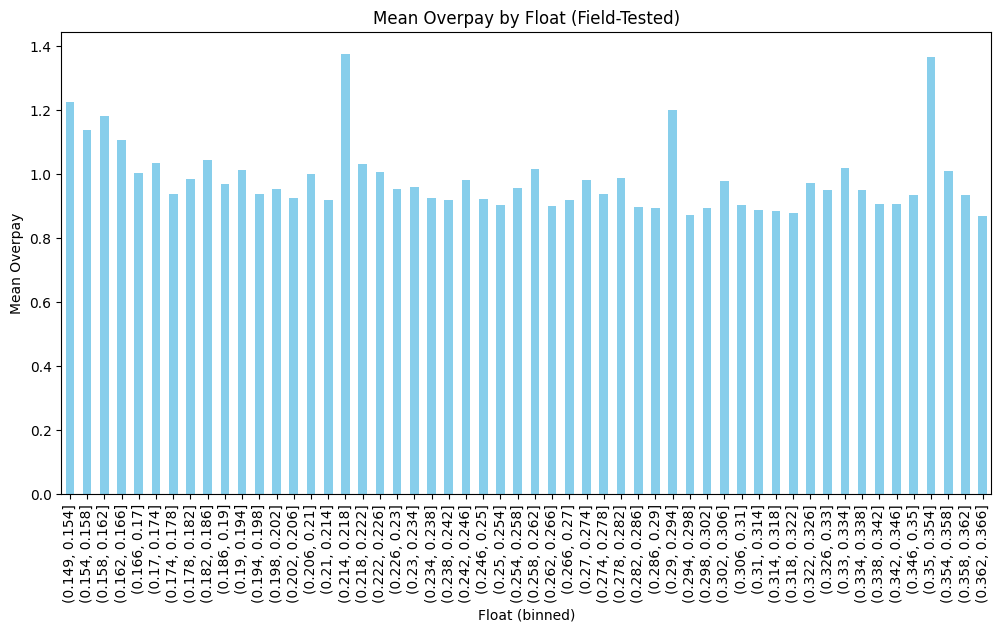

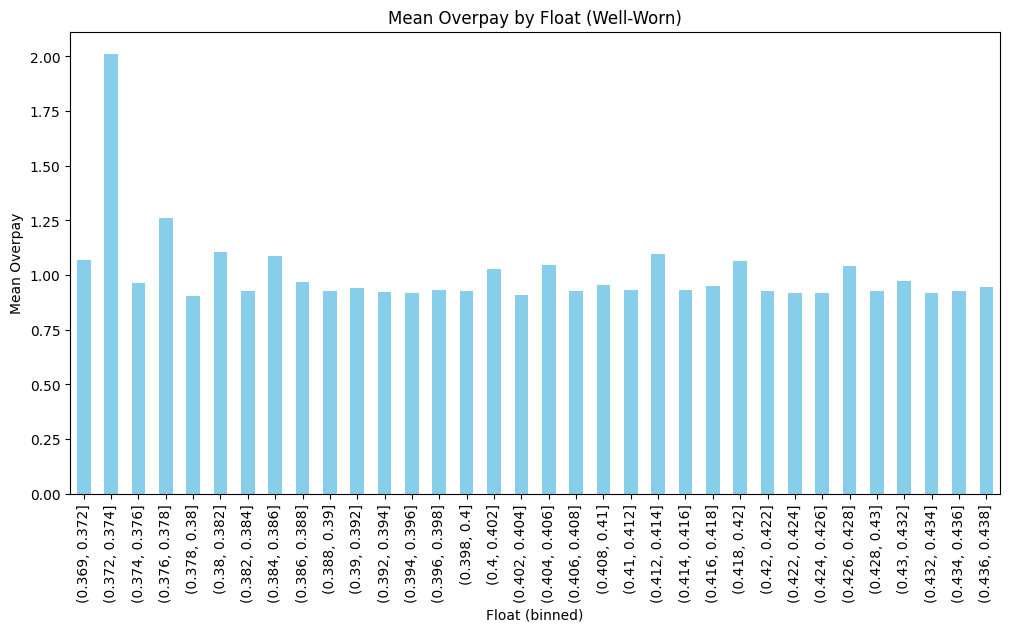

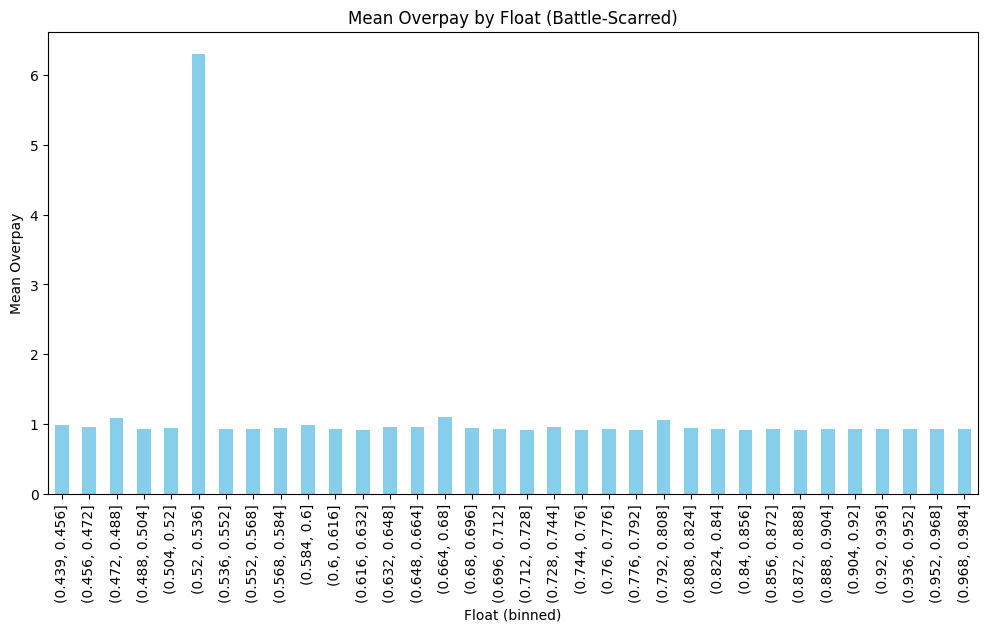

In [221]:
ranges = {
    'Factory New': (0.00, 0.07, 0.002),
    'Minimal Wear': (0.07, 0.15, 0.002),
    'Field-Tested': (0.15, 0.37, 0.004),
    'Well-Worn': (0.37, 0.44, 0.002),
    'Battle-Scarred': (0.44, 1.00, 0.016)
}

# Loop through each range and generate the plots
for label, (start, end, step) in ranges.items():
    bins = np.arange(start, end, step)
    df_with_overpay['float_bin'] = pd.cut(df_with_overpay['float'], bins, include_lowest=True)
    
    # Calculate the mean overpay for each bin
    mean_overpay_by_float_bin = df_with_overpay.groupby('float_bin', observed=True)['overpay'].mean()
    
    # Plot the bar graph
    plt.figure(figsize=(12, 6))
    mean_overpay_by_float_bin.plot(kind='bar', color='skyblue')
    plt.xlabel('Float (binned)')
    plt.ylabel('Mean Overpay')
    plt.title(f'Mean Overpay by Float ({label})')
    plt.show()

**Summary of Mean Overpay by Float (Condition-Based)**:

1. **Factory New**: Items with the lowest float values (closest to 0) have the highest overpay, with a steep drop-off as float increases. This suggests buyers pay significantly more for pristine, low-float items in "Factory New" condition.

2. **Minimal Wear**: Overpay is generally consistent across float ranges but shows occasional spikes, indicating that certain low-float items within "Minimal Wear" attract higher premiums.

3. **Field-Tested**: Overpay remains relatively steady, with mild fluctuations across float bins, suggesting less sensitivity to float in this condition.

4. **Well-Worn**: Shows minor variability in overpay, with a slight preference for lower float values but no strong trends.

5. **Battle-Scarred**: Overpay is mostly stable across float bins, except for a notable spike in one bin, which may indicate demand for rare, specific float values even in heavily worn items.

**Overall**: Lower float values, especially in pristine conditions like "Factory New," attract the highest overpay. As item condition worsens, the influence of float on overpay diminishes, although some rare float values in "Battle-Scarred" still command a premium.

# Regression

We said earlier that our goal is to focus on `overpay`, which is just the difference between `price` and `avg_price` (`price - avg_price`). The `price` is how much someone is selling an item for in USD. There are a lot of things that can affect the `price`, like `sum_sticker_price`, `float`, `phase`, `rarity`, `type`, and more.

[Discussion: how stickers affect prices](https://www.reddit.com/r/csgomarketforum/comments/181ilaq/questionhow_much_value_do_stickers_add_when/) 

[Discussion: how float affect prices](https://www.reddit.com/r/GlobalOffensiveTrade/comments/3g41gl/q_how_much_does_float_value_affect_the_pricing_on/)

[etc](https://www.reddit.com/r/csgomarketforum/comments/gdkfh8/q_can_you_trust_steamanalyst_prices_on_doppler/)

Since there are so many factors, it’s tempting to use the `market_hash_name` because it’s a super-specific identifier for the item. It’s like a shortcut that packs all the item’s details into one name. But here’s the catch: the `market_hash_name` is made from a lot of data transformations, which makes it less flexible and harder to work with directly.

That’s where `classid` and `type` come in. These two fields can pinpoint an item just as well as the `market_hash_name`, but they’re much simpler and don’t have all the extra baggage. Plus, they’re more directly tied to the core details of the item.

So, while using `market_hash_name` might seem like a good idea at first, it’s better to stick with `classid` and `type`. They’re cleaner, easier to handle, and still give us everything we need to figure out what affects `price` and `overpay`. This way, we can build a better system without unnecessary complexity.

---

**P.S.** Special thanks to the anonymous author who provided a detailed breakdown of item identification differences in their [Pastebin post](https://pastebin.com/WLd8efcy). Their insights were instrumental in clarifying these distinctions and guiding this approach.

### Data Preprocessing and Preparation

#### Removal of redundant features

Lets start by dropping `market_hash_name`

In [229]:
df_items_no_out = df_items_no_out.drop(columns=['market_hash_name'])
df_items_no_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383534 entries, 20 to 954572
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  383534 non-null  int64  
 1   classid             383534 non-null  int64  
 2   price               383534 non-null  float64
 3   type                383534 non-null  object 
 4   avg_price           383534 non-null  float64
 5   float               383534 non-null  float64
 6   stickers            119318 non-null  object 
 7   log_price           383534 non-null  float64
 8   log_avg_price       383534 non-null  float64
 9   price_standardized  383534 non-null  float64
 10  sum_sticker_price   383534 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 35.1+ MB


There are some more redundant features from our previous analysis that we used for visualization purposes. Lets remove them as of right now.

In [232]:
redunant_columns = ['price_standardized', 'log_price', 'log_avg_price']
df_items_no_out.drop(columns=[col for col in redunant_columns if col in df_items_no_out.columns], inplace=True)
df_items_no_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383534 entries, 20 to 954572
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 383534 non-null  int64  
 1   classid            383534 non-null  int64  
 2   price              383534 non-null  float64
 3   type               383534 non-null  object 
 4   avg_price          383534 non-null  float64
 5   float              383534 non-null  float64
 6   stickers           119318 non-null  object 
 7   sum_sticker_price  383534 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 26.3+ MB



As we can see, there are many items that lack stickers. These data points are invaluable for our prediction; therefore, let's keep only those with a non-zero value for the `sum_sticker_price` feature.


In [242]:
df_no_zeros = df_items_no_out[df_items_no_out['sum_sticker_price'] > 0]
df_no_zeros.info()
df_no_zeros.nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 25820 entries, 547 to 954552
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 25820 non-null  int64  
 1   classid            25820 non-null  int64  
 2   price              25820 non-null  float64
 3   type               25820 non-null  object 
 4   avg_price          25820 non-null  float64
 5   float              25820 non-null  float64
 6   stickers           25820 non-null  object 
 7   sum_sticker_price  25820 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.8+ MB


id                   25820
classid              22996
price                 9142
type                     6
avg_price             2199
float                25749
stickers             16460
sum_sticker_price     2537
dtype: int64

### Feature engineering

Our goal is to guess `overpay` based on sticker prices on the item. Lets create the said feature.

In [243]:
df_no_zeros['overpay'] = df_no_zeros['price'] - df_no_zeros['avg_price']
df_no_zeros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25820 entries, 547 to 954552
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 25820 non-null  int64  
 1   classid            25820 non-null  int64  
 2   price              25820 non-null  float64
 3   type               25820 non-null  object 
 4   avg_price          25820 non-null  float64
 5   float              25820 non-null  float64
 6   stickers           25820 non-null  object 
 7   sum_sticker_price  25820 non-null  float64
 8   overpay            25820 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 2.0+ MB


C:\Users\user\AppData\Local\Temp\ipykernel_11204\2916440684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_zeros['overpay'] = df_no_zeros['price'] - df_no_zeros['avg_price']


In [244]:
df_no_zeros.nunique()

id                   25820
classid              22996
price                 9142
type                     6
avg_price             2199
float                25749
stickers             16460
sum_sticker_price     2537
overpay              11661
dtype: int64

The `type` feature consists only of 6 distinct values. Lets encode it via OHE

In [245]:
df_no_zeros = pd.get_dummies(df_no_zeros, columns=['type'], drop_first=True)
df_no_zeros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25820 entries, 547 to 954552
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 25820 non-null  int64  
 1   classid            25820 non-null  int64  
 2   price              25820 non-null  float64
 3   avg_price          25820 non-null  float64
 4   float              25820 non-null  float64
 5   stickers           25820 non-null  object 
 6   sum_sticker_price  25820 non-null  float64
 7   overpay            25820 non-null  float64
 8   type_Pistol        25820 non-null  bool   
 9   type_Rifle         25820 non-null  bool   
 10  type_SMG           25820 non-null  bool   
 11  type_Shotgun       25820 non-null  bool   
 12  type_Sniper Rifle  25820 non-null  bool   
dtypes: bool(5), float64(5), int64(2), object(1)
memory usage: 1.9+ MB


### Visualizing and Interpreting the Data

#### Hypothesis for Linear Regression

Before choosing linear regression, we started with a simple hypothesis:

1. **Hypothesis Statement**:
   - The `Price` of an item increases **linearly** with its `avg_price`. Other features, like `sum_sticker_price`, add some variation but don’t break the overall trend.

2. **Why This Hypothesis?**
   - **Logical Relationship**: In most markets, the actual price (`price`) of an item is closely tied to its expected value (`avg_price`). We assume that as `avg_price` rises, so does `price`.
   - **Numerical Features**: Both `price` and `avg_price` are continuous numbers, which makes it reasonable to assume they can have a linear relationship.
   - **Extra Factors**: Features like `sum_sticker_price` may affect `price`, but we expect their impact to be additional or proportional rather than something that would make the relationship non-linear.

3. **Expected Outcome**:
   - We expect a clear upward trend between `avg_price` and `price`, even if there’s some noise in the data. Linear regression should capture this main pattern.

4. **Null and Alternative Hypotheses**:
   - **Null Hypothesis (H₀)**: There is no linear relationship between `avg_price` and `price`.
   - **Alternative Hypothesis (H₁)**: There is a linear relationship between `avg_price` and `price`.

This hypothesis gives us a starting point. If the data supports the linear trend, we can confidently use linear regression to model the relationship.


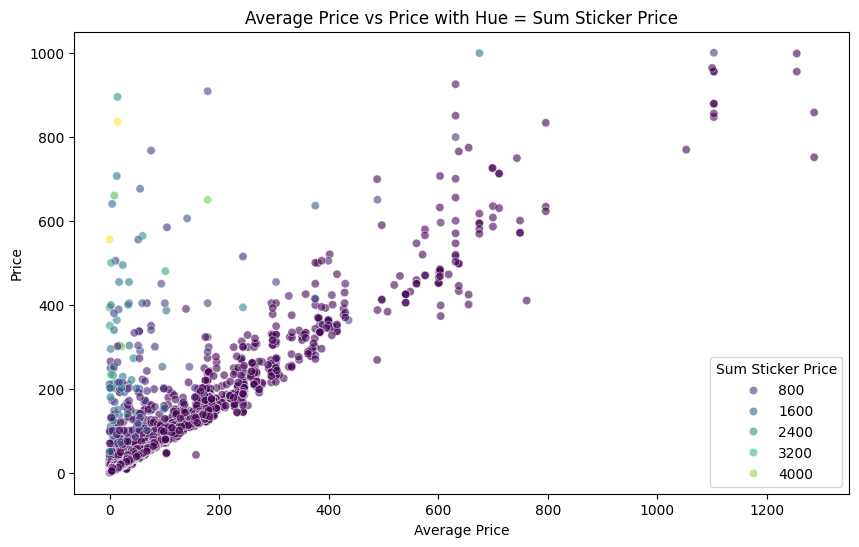

In [227]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_price', y='price', hue='sum_sticker_price', data=df_no_zeros[df_no_zeros['price'] < 1000], palette='viridis', alpha=0.6)
plt.xlabel('Average Price')
plt.ylabel('Price')
plt.title('Average Price vs Price with Hue = Sum Sticker Price')
plt.legend(title='Sum Sticker Price')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11204\20238436.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sum Sticker Price')


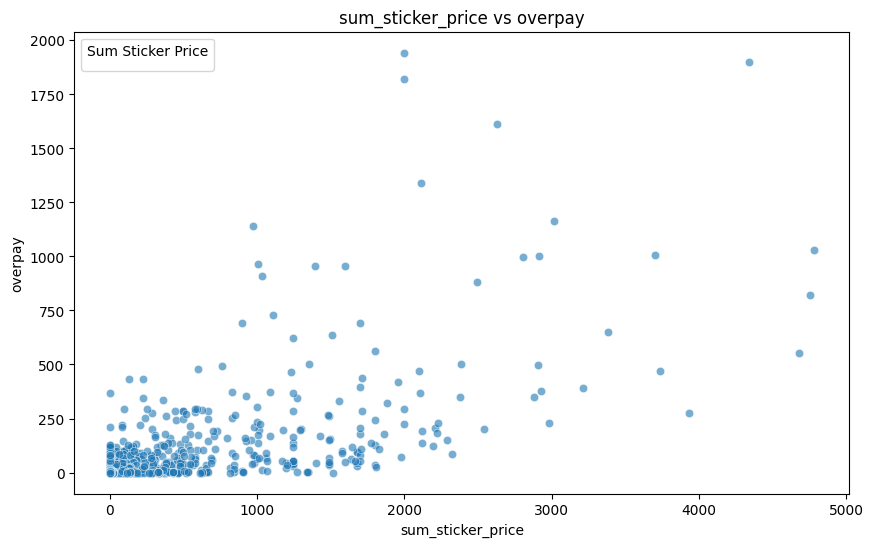

In [252]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sum_sticker_price', y='overpay', data=df_no_zeros[(df_no_zeros["sum_sticker_price"] < 10000) & (df_no_zeros['overpay'] > 0)], alpha=0.6)
plt.xlabel('sum_sticker_price')
plt.ylabel('overpay')
plt.title('sum_sticker_price vs overpay')
plt.legend(title='Sum Sticker Price')
plt.show()

As we can see, itemst with high sum sticker price costs more than average depending on how expensive those stickers are.

Let's prepare the dataset for regression models. We'll drop unnecessary columns like `stickers`, `overpay`, `price`, and `id`,and split the dataset into features (X) and the target variable (y), which is `price`. To normalize the input data we'll use MinMaxScaler. The dataset will be split into training (80%) and testing (20%) subsets to evaluate model performance.
Regression models we using:
1. `Linear Regression` - Simple baseline model.
2. `Lasso` - Adds L1 regularization to improve predictions by reducing less relevant coefficients to zero.
3. `Ridge` - Adds L2 regularization to prevent overfitting and manage multicollinearity.
4. `ElasticNet` - Combines L1 and L2 regularizations for better feature selection and regularization.
For each one we calculate Mean Absolute Error (MAE) to measure prediction accuracy and R2 Score to examine which model fit best.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

X = df_no_zeros.drop(columns=['stickers', 'overpay', 'price', 'id'])
y = df_no_zeros['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'R2': r2}

for name, metrics in results.items():
    print(f"{name} - Mean Absolute Error: {metrics['MAE']:.4f}, R2 Score: {metrics['R2']:.4f}")

Linear Regression - Mean Absolute Error: 6.5174, R2 Score: 0.7962
Lasso - Mean Absolute Error: 6.4234, R2 Score: 0.8255
Ridge - Mean Absolute Error: 6.7442, R2 Score: 0.8256
ElasticNet - Mean Absolute Error: 26.5637, R2 Score: 0.0599


In our case `linear regression` performed reasonably well with an `R2 score` of `0.7962` and `MAE` of  `6.5174,` but `Lasso` showed even better performance with an `R2 score of 0.8255` and lower MAE, likely due to its ability to eliminate irrelevant features. `Ridge` also performed well and achieved a similar R2 score with Lasso but had a slightly higher MAE. `ElasticNet` performed poorly so it won't be suitable for our dataset.
Overall, `Lasso Regression` seems to be the most suitable model for predicting overpay based on the given features, as it balances accuracy and interpretability effectively. Further hyperparameter tuning and feature engineering could improve these results.ё